#Question
**2.1**

Mounted at /content/drive


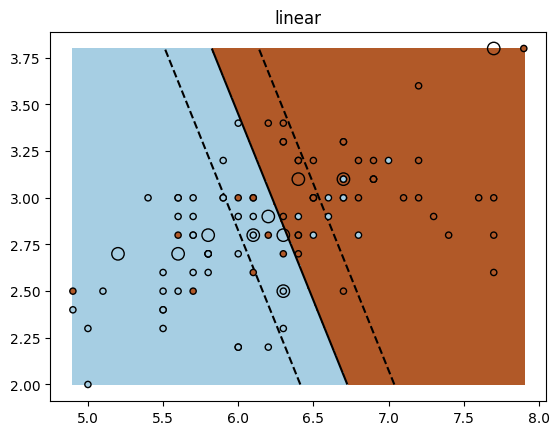

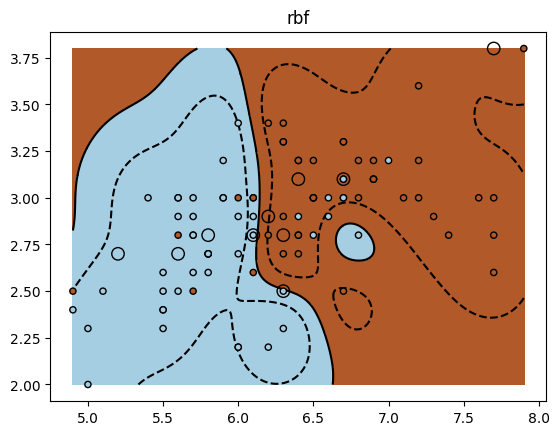

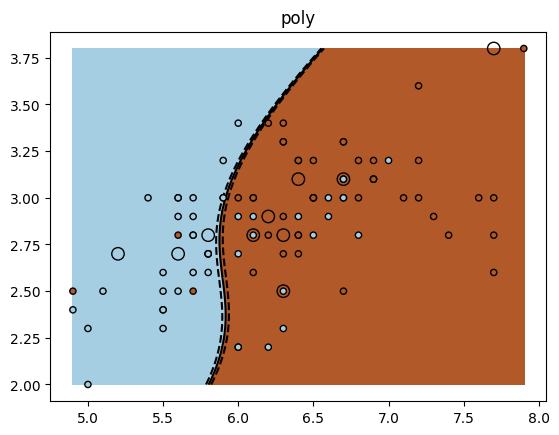

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder

import pandas as pd                                     # Load iris dataset and performing EDA
df = pd.read_csv("/content/drive/My Drive/iris.csv")

df['species'] = df['species'].astype('category')
df['target'] = df['species'].cat.codes#Change values ['setosa','versicolor','virginica'] -> [0,1,2]

features = ['sepal_length','sepal_width']
x,y = df[features].to_numpy(),df['target'].to_numpy()

non_zero_cases = np.where(y != 0)# filtering and taking cases of versicolor & virginica only
X,Y = x[non_zero_cases],y[non_zero_cases]

np.random.seed(0)
indices = np.random.permutation(len(X))
X, Y = X[indices], Y[indices].astype(float)
X_train, Y_train = X[:int(0.9 * len(X))], Y[:int(0.9 * len(X))]
X_test, Y_test = X[int(0.9 * len(X)):], Y[int(0.9 * len(X)):] # Shuffle and split the data

kernels = ["linear", "rbf", "poly"] # kernel types
for kernel in kernels: # fit & plot the models
    clf = svm.SVC(kernel=kernel, gamma=10).fit(X_train, Y_train)
    plt.figure()
    plt.clf()
    plt.scatter(X_train[:, 0],X_train[:, 1],c=Y_train,zorder=10,cmap=plt.cm.Paired,edgecolor="k",s=20)
    plt.scatter(X_test[:, 0],X_test[:, 1],s=80,facecolors="none",zorder=10,edgecolor="k")
    plt.axis("tight")
    x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
    y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],)
    plt.title(kernel)
plt.show()

#Question
**2.2**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


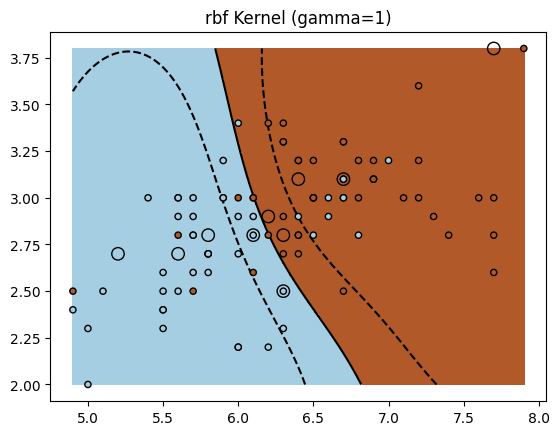

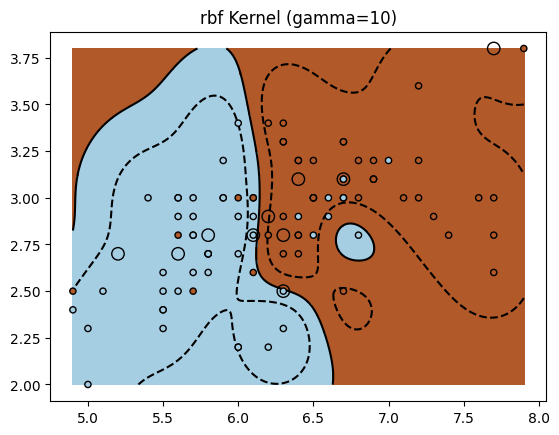

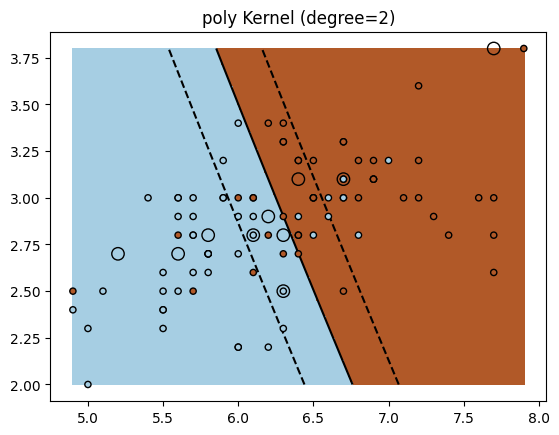

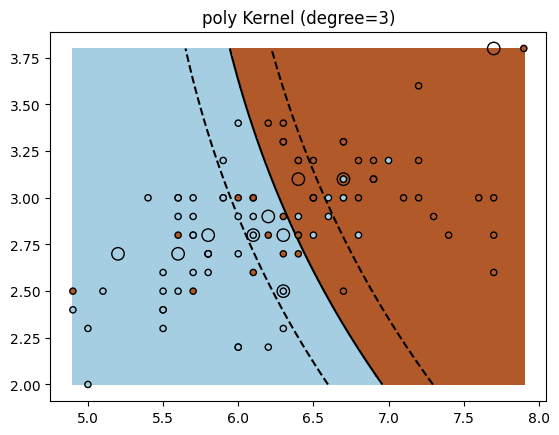

In [2]:
# 2.2
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

# Load iris dataset from a CSV file and perform data preprocessing
df = pd.read_csv("/content/drive/My Drive/iris.csv")

df['species'] = df['species'].astype('category')
df['target'] = df['species'].cat.codes#Change values ['setosa','versicolor','virginica'] -> [0,1,2]

features = ['sepal_length','sepal_width']
x,y = df[features].to_numpy(),df['target'].to_numpy()

non_zero_cases = np.where(y != 0)# filtering and taking cases of versicolor & virginica only
X,Y = x[non_zero_cases],y[non_zero_cases]

np.random.seed(0)
indices = np.random.permutation(len(X))
X, Y = X[indices], Y[indices].astype(float)
X_train, Y_train = X[:int(0.9 * len(X))], Y[:int(0.9 * len(X))]
X_test, Y_test = X[int(0.9 * len(X)):], Y[int(0.9 * len(X)):] # Shuffle and split the data

# Define SVM kernels
kernels = ["linear", "rbf", "poly"]

# Define different values for gamma and degree
gamma_values = [1, 10]  # Radial basis function kernel gamma values
degree_values = [2, 3]  # Polynomial kernel degree values

# Loop over SVM kernels
for kernel in kernels:

    # Loop over different gamma values for the rbf kernel
    if kernel == "rbf":
        for gamma in gamma_values:
            clf = svm.SVC(kernel=kernel, gamma=gamma).fit(X_train, Y_train)
            plt.figure()
            plt.clf()
            plt.scatter(X_train[:, 0],X_train[:, 1],c=Y_train,zorder=10,cmap=plt.cm.Paired,edgecolor="k",s=20,)
            plt.scatter(X_test[:, 0],X_test[:, 1],s=80,facecolors="none",zorder=10,edgecolor="k",)
            plt.axis("tight")
            x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
            y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
            Z = Z.reshape(XX.shape)
            plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
            plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],)
            plt.title(f"{kernel} Kernel (gamma={gamma})")
    # Loop over different degree values for the polynomial kernel
    elif kernel == "poly":
        for degree in degree_values:
            clf = svm.SVC(kernel=kernel, degree=degree).fit(X_train, Y_train)
            plt.figure()
            plt.clf()
            plt.scatter(X_train[:, 0],X_train[:, 1],c=Y_train,zorder=10,cmap=plt.cm.Paired,edgecolor="k",s=20,)
            plt.scatter(X_test[:, 0],X_test[:, 1],s=80,facecolors="none",zorder=10,edgecolor="k",)
            plt.axis("tight")
            x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
            y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
            Z = Z.reshape(XX.shape)
            plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
            plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],)
            plt.title(f"{kernel} Kernel (degree={degree})")

plt.show()


#Question
**2.3**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


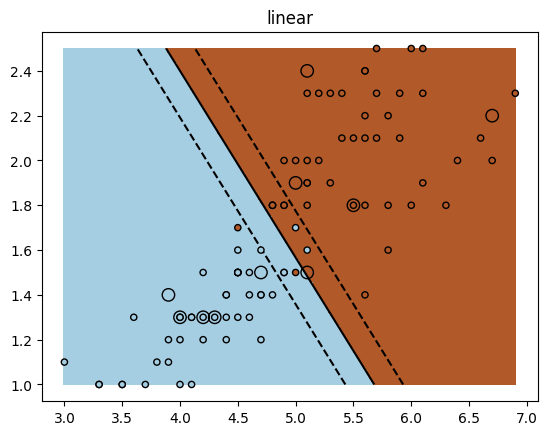

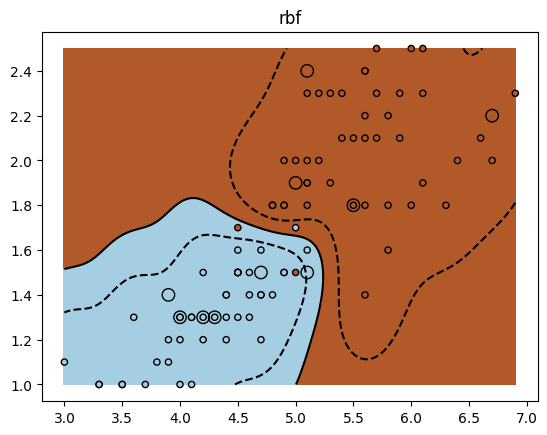

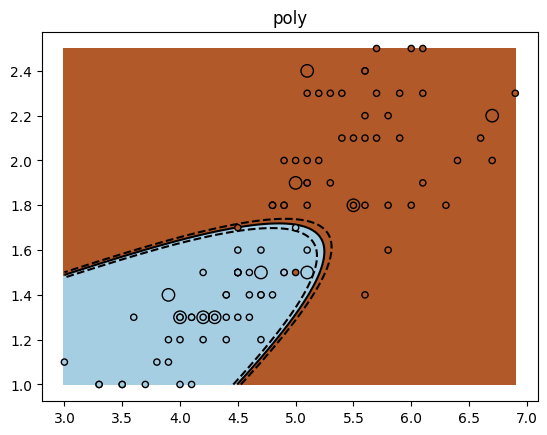

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder

import pandas as pd                                     # Load iris dataset and performing EDA
df = pd.read_csv("/content/drive/My Drive/iris.csv")

df['species'] = df['species'].astype('category')
df['target'] = df['species'].cat.codes#Change values ['setosa','versicolor','virginica'] -> [0,1,2]

features = ['petal_length','petal_width']
x,y = df[features].to_numpy(),df['target'].to_numpy()

non_zero_cases = np.where(y != 0)# filtering and taking cases of versicolor & virginica only
X,Y = x[non_zero_cases],y[non_zero_cases]

np.random.seed(0)
indices = np.random.permutation(len(X))
X, Y = X[indices], Y[indices].astype(float)
X_train, Y_train = X[:int(0.9 * len(X))], Y[:int(0.9 * len(X))]
X_test, Y_test = X[int(0.9 * len(X)):], Y[int(0.9 * len(X)):] # Shuffle and split the data

kernels = ["linear", "rbf", "poly"] # kernel types
for kernel in kernels: # fit & plot the models
    clf = svm.SVC(kernel=kernel, gamma=10).fit(X_train, Y_train)
    plt.figure()
    plt.clf()
    plt.scatter(X_train[:, 0],X_train[:, 1],c=Y_train,zorder=10,cmap=plt.cm.Paired,edgecolor="k",s=20)
    plt.scatter(X_test[:, 0],X_test[:, 1],s=80,facecolors="none",zorder=10,edgecolor="k")
    plt.axis("tight")
    x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
    y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],)
    plt.title(kernel)
plt.show()

#Question
**2.4**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


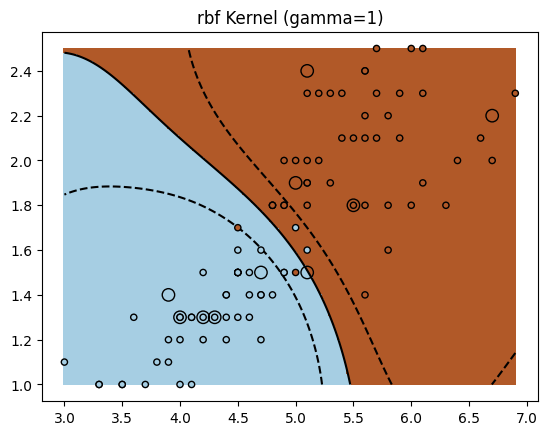

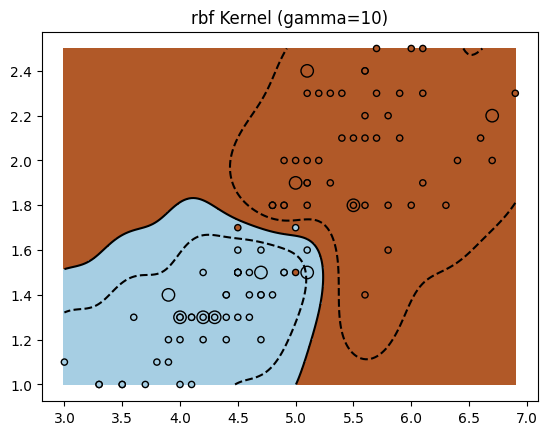

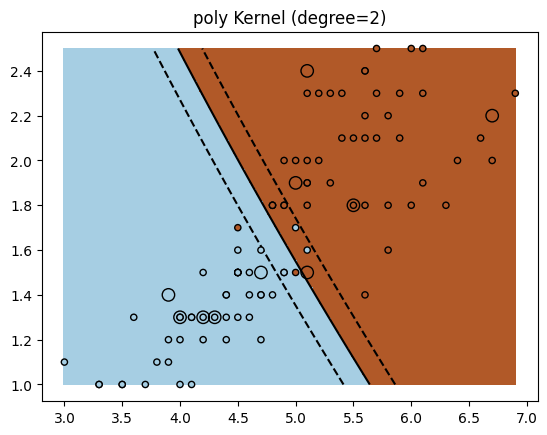

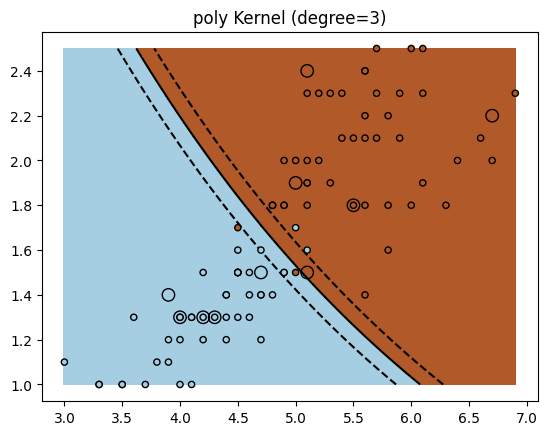

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

# Load iris dataset from a CSV file and perform data preprocessing
df = pd.read_csv("/content/drive/My Drive/iris.csv")

df['species'] = df['species'].astype('category')
df['target'] = df['species'].cat.codes#Change values ['setosa','versicolor','virginica'] -> [0,1,2]

features = ['petal_length','petal_width']
x,y = df[features].to_numpy(),df['target'].to_numpy()

non_zero_cases = np.where(y != 0)# filtering and taking cases of versicolor & virginica only
X,Y = x[non_zero_cases],y[non_zero_cases]

np.random.seed(0)
indices = np.random.permutation(len(X))
X, Y = X[indices], Y[indices].astype(float)
X_train, Y_train = X[:int(0.9 * len(X))], Y[:int(0.9 * len(X))]
X_test, Y_test = X[int(0.9 * len(X)):], Y[int(0.9 * len(X)):] # Shuffle and split the data

# Define SVM kernels
kernels = ["linear", "rbf", "poly"]

# Define different values for gamma and degree
gamma_values = [1, 10]  # Radial basis function kernel gamma values
degree_values = [2, 3]  # Polynomial kernel degree values

# Loop over SVM kernels
for kernel in kernels:

    # Loop over different gamma values for the rbf kernel
    if kernel == "rbf":
        for gamma in gamma_values:
            clf = svm.SVC(kernel=kernel, gamma=gamma).fit(X_train, Y_train)
            plt.figure()
            plt.clf()
            plt.scatter(X_train[:, 0],X_train[:, 1],c=Y_train,zorder=10,cmap=plt.cm.Paired,edgecolor="k",s=20,)
            plt.scatter(X_test[:, 0],X_test[:, 1],s=80,facecolors="none",zorder=10,edgecolor="k",)
            plt.axis("tight")
            x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
            y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
            Z = Z.reshape(XX.shape)
            plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
            plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],)
            plt.title(f"{kernel} Kernel (gamma={gamma})")
    # Loop over different degree values for the polynomial kernel
    elif kernel == "poly":
        for degree in degree_values:
            clf = svm.SVC(kernel=kernel, degree=degree).fit(X_train, Y_train)
            plt.figure()
            plt.clf()
            plt.scatter(X_train[:, 0],X_train[:, 1],c=Y_train,zorder=10,cmap=plt.cm.Paired,edgecolor="k",s=20,)
            plt.scatter(X_test[:, 0],X_test[:, 1],s=80,facecolors="none",zorder=10,edgecolor="k",)
            plt.axis("tight")
            x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
            y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
            Z = Z.reshape(XX.shape)
            plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
            plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],)
            plt.title(f"{kernel} Kernel (degree={degree})")

plt.show()


#Question
**2.5**

In [5]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd                                     # Load iris dataset and performing EDA
df = pd.read_csv("/content/drive/My Drive/iris.csv")

features = ['sepal_length','sepal_width']
list_features = df[features]
target = df['species']

x_train,x_test,y_train,y_test = train_test_split(list_features,target,test_size = 0.20)

model = svm.SVC(kernel="linear")
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred)*100,'%')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
93.33333333333333 %
